In [1]:
!ls data/export_hackathon

1913  1914  1915  1916	1917  1918  1919  1920


In [2]:
!ls data/export_hackathon/1913/

abo_underrattelser  illustrierte_kronen_zeitung  uusi_aura
arbeiter_zeitung    innsbrucker_nachrichten	 uusi_suometar
helsingin_sanomat   le_matin			 vastra_finland
hufvudstadsbladet   neue_freie_presse


- **journal**:
    - issue:
        ~~~json
        [
            {id, date, language, full_text, named_entities}
        ]
        ~~~
    - articles:
        ~~~json
        [
            {id, full_text, images, named_entities}
        ]
        ~~~

In [2]:
import os
from os.path import join
from os import listdir

DATA_PATH = os.path.abspath('data/export_hackathon/')

[os.makedirs(join('entities', year), exist_ok=True) for year in listdir(DATA_PATH)]

[None, None, None, None, None, None, None, None]

In [1]:
from scripts import extract_locations

# extract_locations

In [2]:
import pandas as pd

data = pd.read_json('entities/1913/arbeiter_zeitung.json')
data

,id,link,type,mention,start_idx,end_idx,stance,date
0,entity_mention_arbeiter_zeitung_aze19130101_0,None,LOC,Aninehee,8,16,0,1913-01-01
1,entity_mention_arbeiter_zeitung_aze19130101_1,None,LOC,Rechte Wienzeile 87,18,37,0,1913-01-01
2,entity_mention_arbeiter_zeitung_aze19130101_2,None,LOC,I . Tchulerstraße,39,55,0,1913-01-01
3,entity_mention_arbeiter_zeitung_aze19130101_4,None,LOC,übermhmen,5,14,0,1913-01-01
4,entity_mention_arbeiter_zeitung_aze19130101_7,https://www.wikidata.org/wiki/Q284286,LOC,sit,105,108,0,1913-01-01
...,...,...,...,...,...,...,...,...
195561,entity_mention_arbeiter_zeitung_aze19131231_1061,None,LOC,"Mariahilferstraße 43 , 1 Stock",104,133,0,1913-12-31
195562,entity_mention_arbeiter_zeitung_aze19131231_1064,None,LOC,Redtenbachergasse 6,48,67,0,1913-12-31
195563,entity_mention_arbeiter_zeitung_aze19131231_1065,None,LOC,Breitegasse,5,16,0,1913-12-31
195564,entity_mention_arbeiter_zeitung_aze19131231_1068,None,LOC,Praterstrasse 8,92,107,0,1913-12-31


In [2]:
from scripts import extract_freqs

# extract_freqs

In [8]:
data = pd.read_json('freqs/1920.json')

data.sort_values('illukronzeit', ascending=False)

,arbezeit,illukronzeit,innsnach,lemati,loeuv,neuefreipres
Q1741,7142,6435,10302,0,0,30290
Q1454534,71,982,7,0,0,1636
Q28,2558,595,1576,160,113,4634
Q64,2476,538,3720,1823,770,6430
Q1781,1552,498,1353,73,109,3907
...,...,...,...,...,...,...
Q327142,0,0,1,1,2,0
Q631265,0,0,1,0,0,0
Q2360605,0,0,1,0,0,1
Q4993674,0,0,1,0,0,0


In [115]:
import json

with open('location_article_lengths', 'w') as out:
    json.dump(lengths, out)

<AxesSubplot:ylabel='Count'>

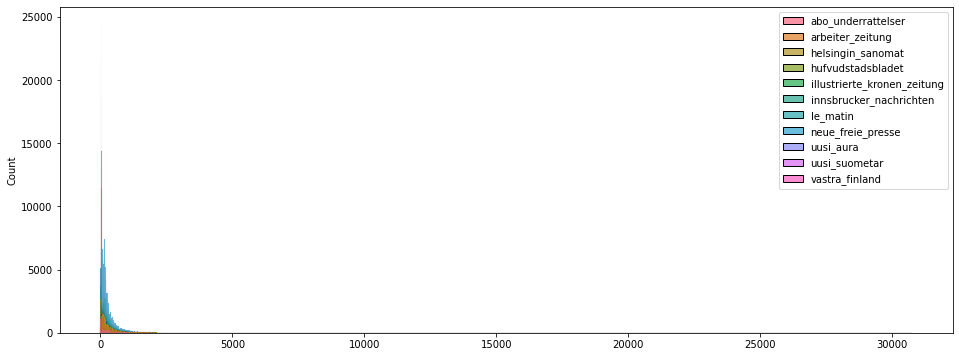

In [116]:
plt.figure(figsize=(16, 6))
sns.histplot(lengths['1913'])

/home/vagrant/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


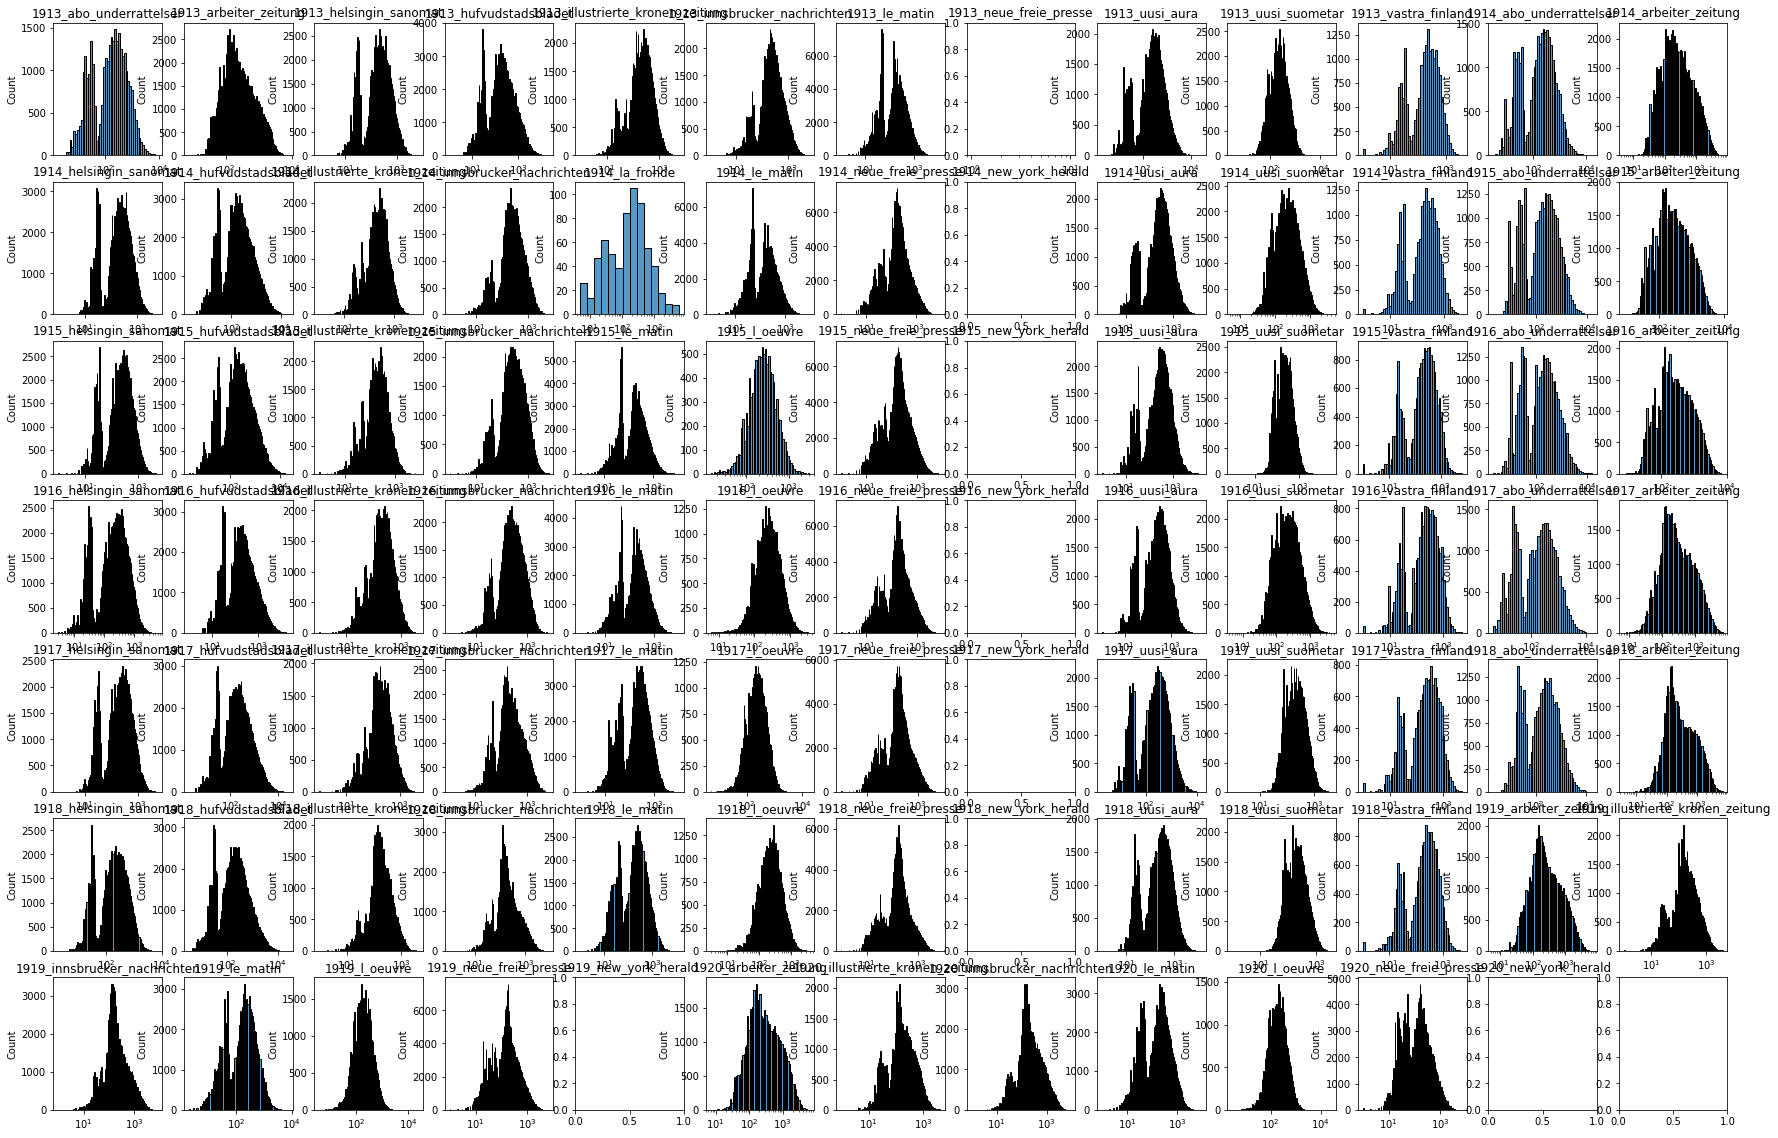

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 13, figsize=(30, 20))
i = 0

for year in lengths:
    for journal in lengths[year]:
        try:
            sns.histplot(lengths[year][journal], ax=axes.flat[i], log_scale=True)
        except:
            pass
        axes.flat[i].set_title(f'{year}_{journal}')
        i += 1